In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
from shapely.ops import unary_union
import contextily as ctx

In [2]:
## Load shape file
nl = gpd.read_file("./Netherlands/maps.shp")
nl.head()

,place_name,bbox_north,bbox_south,bbox_east,bbox_west,geometry
0,"Groningen, Netherlands, The Netherlands",53.264947,53.178610,6.666873,6.462746,"POLYGON ((6.46275 53.20198, 6.46314 53.20220, ..."
1,"Friesland, Netherlands, The Netherlands",53.539713,52.764805,6.427615,4.818376,"POLYGON ((4.81838 53.21427, 4.83319 53.22633, ..."
2,"Drenthe, Netherlands, The Netherlands",53.203832,52.612195,7.092740,6.119820,"POLYGON ((6.11982 52.85422, 6.12051 52.85447, ..."
3,"Overijssel, Netherlands, The Netherlands",52.854215,52.118069,7.072763,5.777750,"POLYGON ((5.77775 52.58300, 5.77797 52.60753, ..."
4,"Gelderland, Netherlands, The Netherlands",52.522025,51.733581,6.832802,4.993855,"POLYGON ((4.99385 51.86071, 4.99385 51.86075, ..."


In [3]:
## Number of regions
len(nl)

12

<AxesSubplot:>

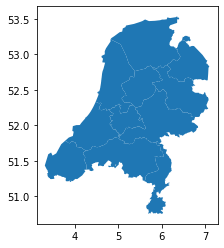

In [4]:
nl.plot()

In [24]:
nlcoord = nl['geometry'][:]

In [25]:
nlcoord

0     POLYGON ((6.46275 53.20198, 6.46314 53.20220, ...
1     POLYGON ((4.81838 53.21427, 4.83319 53.22633, ...
2     POLYGON ((6.11982 52.85422, 6.12051 52.85447, ...
3     POLYGON ((5.77775 52.58300, 5.77797 52.60753, ...
4     POLYGON ((4.99385 51.86071, 4.99385 51.86075, ...
5     POLYGON ((5.06043 52.57894, 5.07459 52.58367, ...
6     POLYGON ((4.79204 52.12231, 4.79206 52.12238, ...
7     POLYGON ((4.47765 52.33251, 4.47919 52.33473, ...
8     POLYGON ((3.77368 51.78152, 3.80174 51.79670, ...
9     POLYGON ((3.30794 51.43337, 3.32030 51.45825, ...
10    MULTIPOLYGON (((4.19012 51.60275, 4.19028 51.6...
11    POLYGON ((5.56605 51.22091, 5.57173 51.22194, ...
Name: geometry, dtype: geometry

In [20]:
polylist = [p for p in nlcoord]

In [29]:
polylist

In [8]:
pop = pd.read_csv("./population2019.csv")

In [11]:
pop['Population']

0      583990
1      647672
2      492167
3     1156431
4     2071972
5      416546
6     1342158
7     2853359
8     3673893
9      383032
10    2544806
11    1116137
Name: Population, dtype: int64

In [30]:
polyframe = gpd.GeoDataFrame(geometry=polylist)

In [31]:
polyframe

,geometry
0,"POLYGON ((6.46275 53.20198, 6.46314 53.20220, ..."
1,"POLYGON ((4.81838 53.21427, 4.83319 53.22633, ..."
2,"POLYGON ((6.11982 52.85422, 6.12051 52.85447, ..."
3,"POLYGON ((5.77775 52.58300, 5.77797 52.60753, ..."
4,"POLYGON ((4.99385 51.86071, 4.99385 51.86075, ..."
5,"POLYGON ((5.06043 52.57894, 5.07459 52.58367, ..."
6,"POLYGON ((4.79204 52.12231, 4.79206 52.12238, ..."
7,"POLYGON ((4.47765 52.33251, 4.47919 52.33473, ..."
8,"POLYGON ((3.77368 51.78152, 3.80174 51.79670, ..."
9,"POLYGON ((3.30794 51.43337, 3.32030 51.45825, ..."


In [32]:
polyframe['population'] = pop['Population']

In [33]:
polyframe

,geometry,population
0,"POLYGON ((6.46275 53.20198, 6.46314 53.20220, ...",583990
1,"POLYGON ((4.81838 53.21427, 4.83319 53.22633, ...",647672
2,"POLYGON ((6.11982 52.85422, 6.12051 52.85447, ...",492167
3,"POLYGON ((5.77775 52.58300, 5.77797 52.60753, ...",1156431
4,"POLYGON ((4.99385 51.86071, 4.99385 51.86075, ...",2071972
5,"POLYGON ((5.06043 52.57894, 5.07459 52.58367, ...",416546
6,"POLYGON ((4.79204 52.12231, 4.79206 52.12238, ...",1342158
7,"POLYGON ((4.47765 52.33251, 4.47919 52.33473, ...",2853359
8,"POLYGON ((3.77368 51.78152, 3.80174 51.79670, ...",3673893
9,"POLYGON ((3.30794 51.43337, 3.32030 51.45825, ...",383032


In [36]:
## Gets all geometry locations
places = nl['geometry'].iloc[:]
west, south, east, north = unary_union(places).bounds

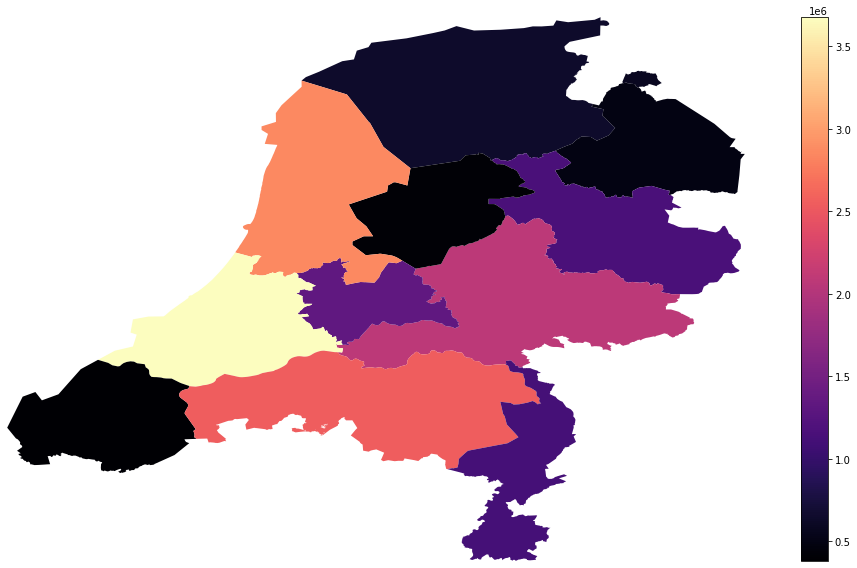

In [47]:
fig, ax = plt.subplots(figsize=(20,10))
polyframe.plot(ax=ax, column = 'population', legend = True, cmap='magma')

ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.axis('off')
plt.show()